# Imports

In [8]:
%matplotlib inline

from qiskit import *
from qiskit.execute_function import execute
from qiskit.tools.visualization import plot_histogram

from math import pi

# Circuit Design

In [9]:
qr = QuantumRegister(3)
cr = ClassicalRegister(1)

circuit = QuantumCircuit(qr, cr)

In [10]:
circuit.clear()

circuit.reset(qr[1:3])
circuit.h(qr[1])
circuit.cnot(qr[1], qr[2])
#----------------------------------#
circuit.barrier()
#----------------------------------#
circuit.reset(qr[0])
circuit.ry(pi/3, qr[0])
#----------------------------------#
circuit.barrier()
#----------------------------------#
circuit.cnot(qr[0], qr[1])
circuit.h(qr[0])
circuit.i(qr[1])
circuit.cnot(qr[1], qr[2])
circuit.cz(qr[0],qr[2])
#----------------------------------#
circuit.barrier()
#----------------------------------#
circuit.measure(qr[2], cr)

circuit.draw()

░      ┌─────────┐ ░      ┌───┐         ░    
q17_0: ────────────────░──|0>─┤ Ry(π/3) ├─░───■──┤ H ├──────■──░────
            ┌───┐      ░      └─────────┘ ░ ┌─┴─┐├───┤      │  ░    
q17_1: ─|0>─┤ H ├──■───░──────────────────░─┤ X ├┤ I ├──■───┼──░────
            └───┘┌─┴─┐ ░                  ░ └───┘└───┘┌─┴─┐ │  ░ ┌─┐
q17_2: ─|0>──────┤ X ├─░──────────────────░───────────┤ X ├─■──░─┤M├
                 └───┘ ░                  ░           └───┘    ░ └╥┘
 c1: 1/═══════════════════════════════════════════════════════════╩═
                                                                  0

# Simulation with AER

In [18]:
simulator = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, simulator)

In [20]:
# Results in either 1/2*(1,1,1,1,0,0,0,0) or 1/2*(0,0,0,0,1,1,1,1)
result = job.result()
result.get_statevector()

array([0. +0.00000000e+00j, 0. +0.00000000e+00j, 0. +0.00000000e+00j,
       0. +0.00000000e+00j, 0.5-1.00052088e-16j, 0.5-1.00052088e-16j,
       0.5-1.00052088e-16j, 0.5-1.00052088e-16j])

In [13]:
simulator = Aer.get_backend('qasm_simulator')

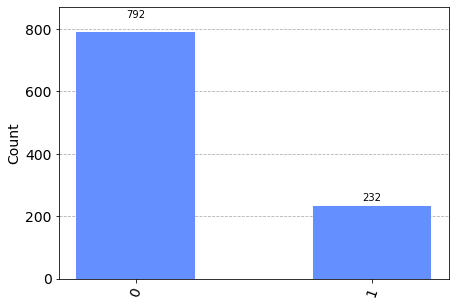

In [14]:
result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))

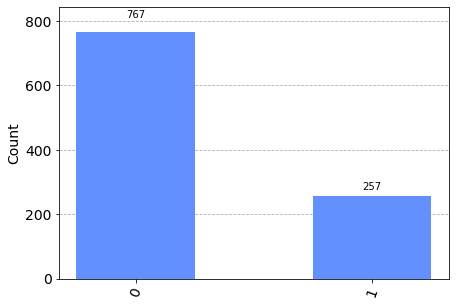

In [15]:
result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))